# 0. Importing Libraries/ reading Data

In [26]:
import pandas as pd
import sys
from os import listdir, path
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS


In [3]:
sys.path.insert(0, "../functions")
#self defined functions
import data_processing as dp

In [4]:
mlb = pd.read_csv("../data/tidied_text_added.csv")

In [5]:
mlb.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count,tweetquote Count,conversation ID,source,retweeted Tweet,quotedTweet,mentioned Users,language,hashtag,mentioned,cleaned_text,cleaned_text_list
0,0,2021-12-30 23:59:47+00:00,1476704601424465921,That's is if we're allowed #Baseball ever agai...,LittlePickles9,0,0,0,0,1476704601424465921,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/LittlePickles9/status/1476...,NaN,en,"['#baseball', '#mlb', '#lockout']",[],allowed baseball ever mlb lockout,"['ever', 'baseball', 'lockout', 'allow', 'mlb']"
1,1,2021-12-30 23:54:30+00:00,1476703271221878793,Joining @RR_RicardoFAN next is @dcone36 to dis...,CBSSportsRadio,0,2,6,0,1476703271221878793,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='RR_RicardoFAN', id=23912945, d...",en,[],"['@rr_ricardofan', '@dcone36']",joining rr_ricardofan next dcone36 discuss mlb...,"['need', 'join', 'discuss', 'start', 'time', '..."
2,2,2021-12-30 23:34:26+00:00,1476698220176814081,When do you think the MLB Lockout is over?,NYYSportsfan96,0,0,0,0,1476698220176814081,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,en,[],[],think mlb lockout,"['lockout', 'think', 'mlb']"
3,3,2021-12-30 23:24:16+00:00,1476695662930501633,WHEN IS THE MLB LOCKOUT GOING TO BE OVER ‼️‼️‼...,itstitoo_,0,0,0,0,1476695662930501633,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,en,[],[],mlb lockout going,"['lockout', 'mlb', 'go']"
4,4,2021-12-30 23:20:33+00:00,1476694729270071302,"MLB lockout mailbag: Major sticking points, po...",JenniferHeiner_,0,0,0,0,1476694729270071302,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,NaN,NaN,en,[],[],mlb lockout mailbag major sticking points pote...,"['point', 'train', 'stick', 'delay', 'mailbag'..."


# 1. Word Appearance Frequency Vizualization
1. Bar Chart
2. Word Cloud 

## 1.1 Bar Chart of Word Appearance Frequency

In [6]:
# test
test = dict(dp.count_words("test this is a test"))
test

{'test': 2, 'this': 1, 'is': 1, 'a': 1}

In [15]:
count_dict = dp.count_words_in_df(
    mlb, "cleaned_text", ["mlb", "lockout", "mlblockout"])


In [16]:
count_df = pd.DataFrame({"word":count_dict.keys(),"count":count_dict.values()}).sort_values("count",ascending=False)

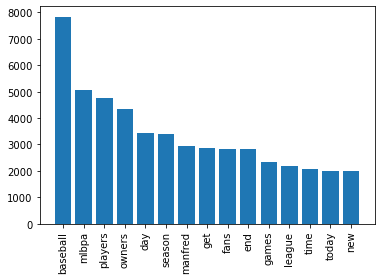

In [34]:
# plt.figure(figsize=(40,30))
plt.bar(count_df.head(15)["word"], count_df.head(15)["count"])
plt.xticks(rotation=90)
plt.show()


## 1.2 Word Cloud

In [22]:
# s = pd.Series()
# for text in mlb.cleaned_text:
#     s. text
bubble = pd.Series(mlb.cleaned_text).str.cat(sep=' ')


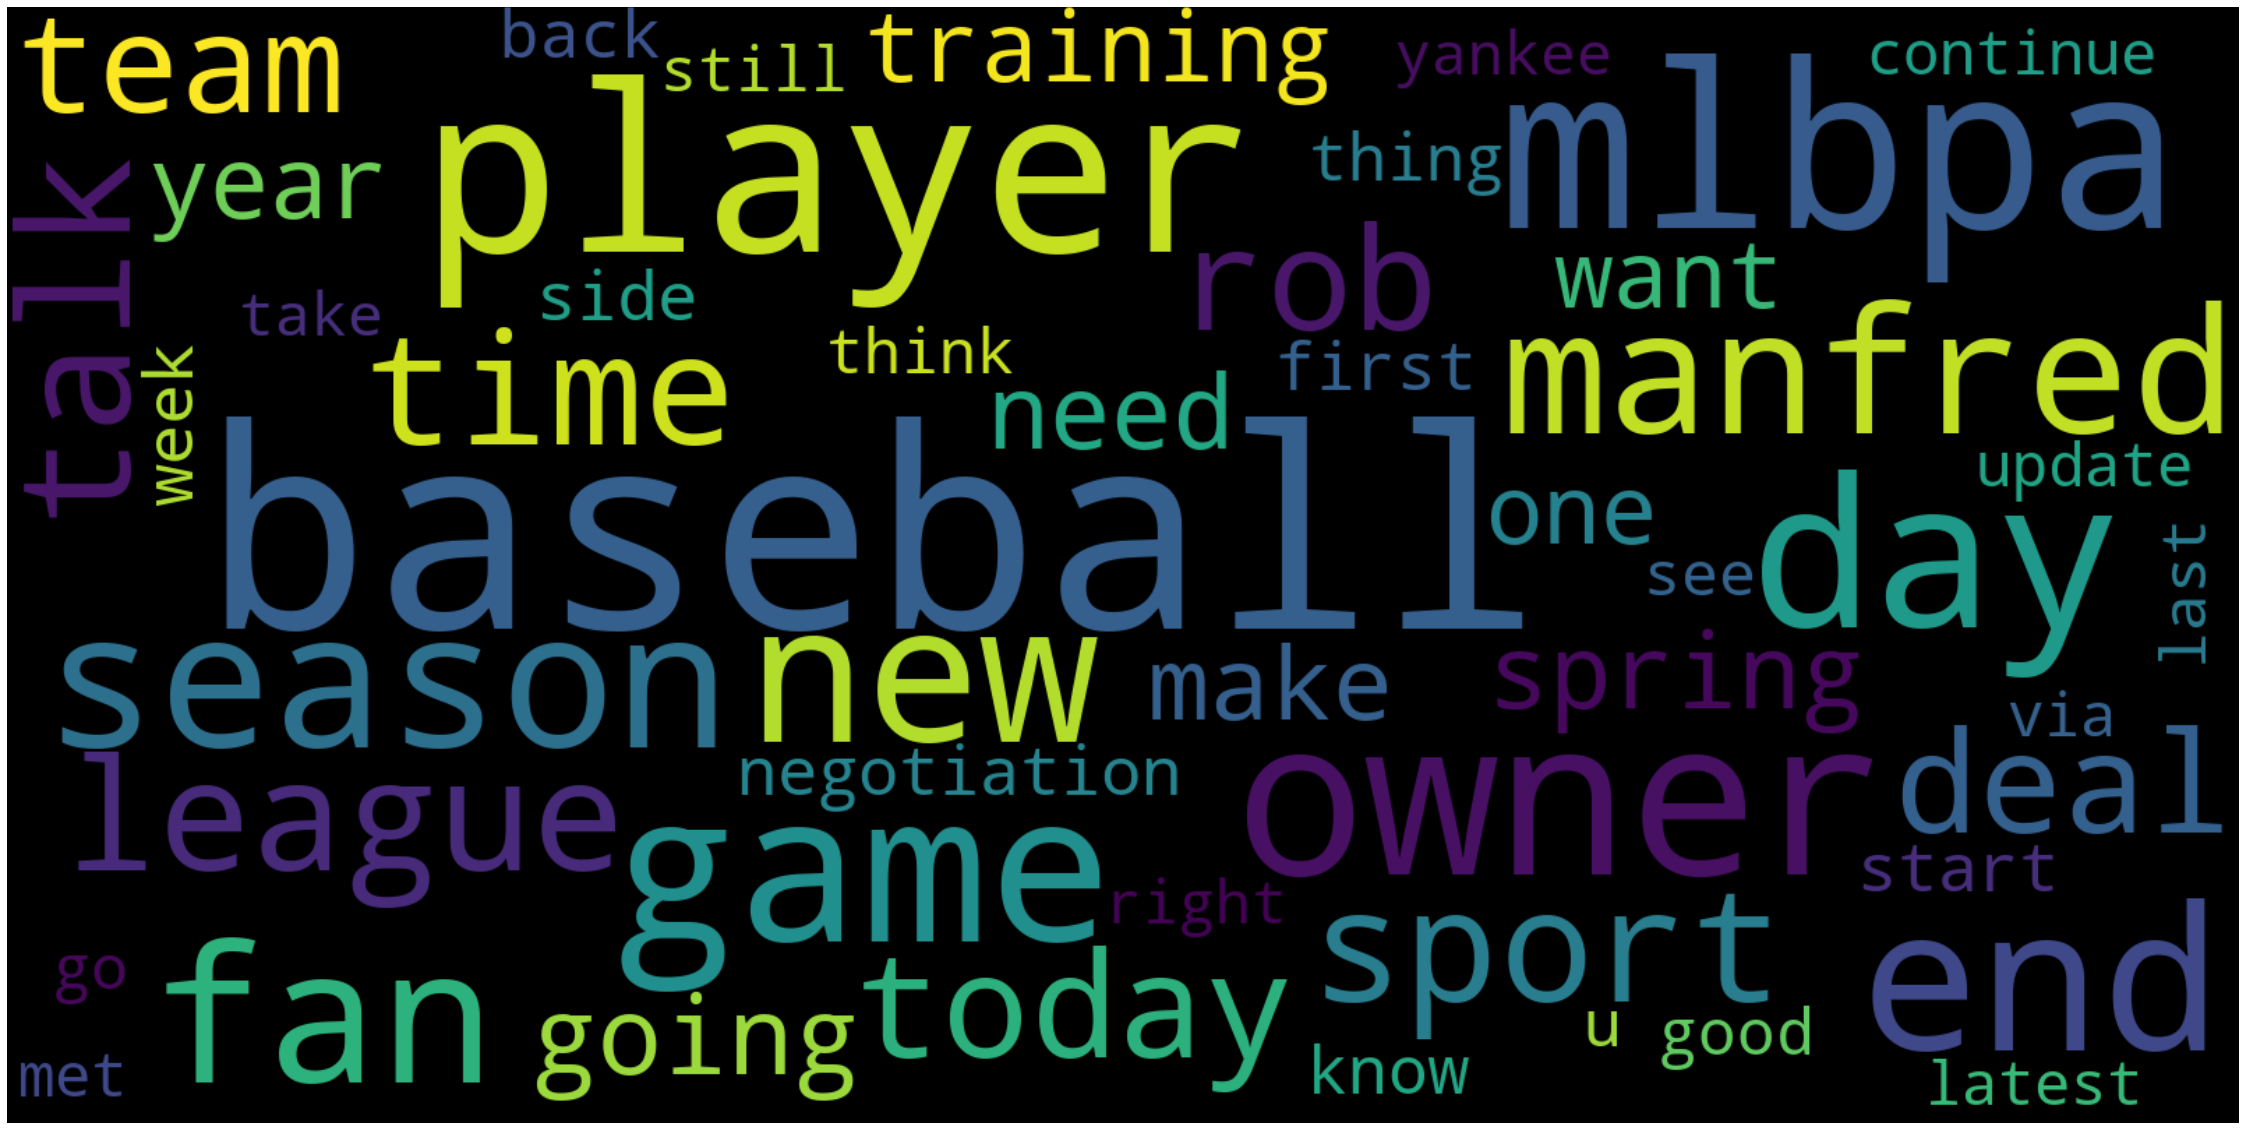

In [29]:
stopwords = set(STOPWORDS)
stopwords.update(["mlb","lockout","mlblockout"]) 
wordcloud = WordCloud(width=1600,stopwords = stopwords, height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(bubble)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()